In [1]:
1.	Display following image operation in MATLAB/Python - i) Histogram  image  ii) Low pass filter mage  iii) High pass image.

45662

Matplotlib is building the font cache; this may take a moment.


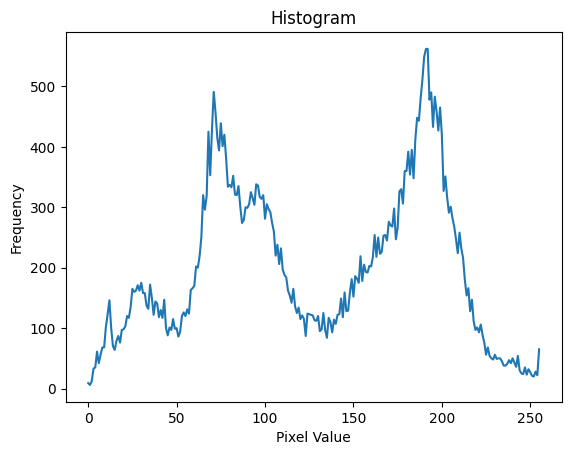

In [4]:
import cv2
import matplotlib.pyplot as plt

# Load the image
image_path = 'flow.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Calculate the histogram
hist = cv2.calcHist([image], [0], None, [256], [0, 256])

# Plot the histogram
plt.plot(hist)
plt.title('Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.show()


In [6]:
import cv2
import numpy as np

# Load the image
image_path = 'flow.jpg'
image = cv2.imread(image_path)

# Apply Gaussian blur (low pass filter)
blurred_image = cv2.GaussianBlur(image, (5, 5), 0)

# Display the original and blurred images
cv2.imshow('Original Image', image)
cv2.imshow('Blurred Image', blurred_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [7]:
import cv2
import numpy as np

# Load the image
image_path = 'flow.jpg'
image = cv2.imread(image_path)

# Create a kernel for high pass filtering
kernel = np.array([[-1, -1, -1],
                   [-1,  9, -1],
                   [-1, -1, -1]])

# Apply the kernel to perform high pass filtering (sharpening)
high_pass_image = cv2.filter2D(image, -1, kernel)

# Display the original and high pass images
cv2.imshow('Original Image', image)
cv2.imshow('High Pass Image', high_pass_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [ ]:
2.	Write a Python program to read ‘rice.tif’ image, count number of rice and display area (also specific range), major axis length, and perimeter.

In [8]:
import cv2
import numpy as np

# Load the rice.tif image
image_path = 'rice.tif'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Threshold the image to create a binary mask
_, thresholded = cv2.threshold(image, 100, 255, cv2.THRESH_BINARY)

# Find contours in the binary image
contours, _ = cv2.findContours(thresholded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Initialize counters for rice properties
rice_count = 0
total_area = 0
total_major_axis_length = 0
total_perimeter = 0

# Loop through each contour and calculate properties
for contour in contours:
    # Calculate area and perimeter
    area = cv2.contourArea(contour)
    perimeter = cv2.arcLength(contour, True)
    
    # Skip small contours
    if area < 100:
        continue
    
    # Calculate major axis length using fitting an ellipse
    if len(contour) >= 5:
        ellipse = cv2.fitEllipse(contour)
        major_axis_length = max(ellipse[1])
    else:
        major_axis_length = 0
    
    # Accumulate properties
    rice_count += 1
    total_area += area
    total_major_axis_length += major_axis_length
    total_perimeter += perimeter

    # Draw contours on the original image
    cv2.drawContours(image, [contour], 0, (0, 255, 0), 2)

# Display the image with contours
cv2.imshow('Rice Grains with Contours', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Print the results
print(f"Number of rice grains: {rice_count}")
print(f"Total area of rice grains: {total_area:.2f} pixels")
print(f"Average major axis length: {total_major_axis_length / rice_count:.2f} pixels")
print(f"Total perimeter of rice grains: {total_perimeter:.2f} pixels")


Number of rice grains: 24
Total area of rice grains: 29477.50 pixels
Average major axis length: 35.93 pixels
Total perimeter of rice grains: 3453.94 pixels


In [ ]:
3.	Write a MATLAB/Python program to read an image and perform convolution with 3X3 mask

In [10]:
import cv2
import numpy as np

# Load the image
image_path = 'flow.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Define a 3x3 convolution mask (example: edge detection)
convolution_mask = np.array([[-1, -1, -1],
                             [-1,  8, -1],
                             [-1, -1, -1]])

# Apply convolution using the filter2D function
convolved_image = cv2.filter2D(image, -1, convolution_mask)

# Display the original and convolved images
cv2.imshow('Original Image', image)
cv2.imshow('Convolved Image', convolved_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [ ]:
4.	Write a MATLAB/Python program to read an image and perform Lapliciant filter mask

In [11]:
import cv2

# Load the image
image_path = 'flow.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Apply the Laplacian filter using the Laplacian function
laplacian_image = cv2.Laplacian(image, cv2.CV_64F)

# Convert the result to unsigned 8-bit (normalize the output)
laplacian_image = cv2.convertScaleAbs(laplacian_image)

# Display the original and Laplacian-filtered images
cv2.imshow('Original Image', image)
cv2.imshow('Laplacian Filtered Image', laplacian_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [ ]:
5.	Write a MATLAB/Python program to identify horizontal, vertical lines from an image

In [12]:
import cv2
import numpy as np

# Load the image
image_path = 'flow.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Apply Gaussian blur to reduce noise and improve edge detection
blurred_image = cv2.GaussianBlur(image, (5, 5), 0)

# Detect edges using Canny edge detection
edges = cv2.Canny(blurred_image, 50, 150)

# Perform a Hough Line Transform to detect lines
lines = cv2.HoughLinesP(edges, 1, np.pi / 180, threshold=100, minLineLength=100, maxLineGap=10)

# Draw the detected lines on a copy of the original image
lines_image = image.copy()

if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(lines_image, (x1, y1), (x2, y2), (0, 255, 0), 2)

# Display the original image and the image with detected lines
cv2.imshow('Original Image', image)
cv2.imshow('Image with Detected Lines', lines_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [ ]:
6.	For the given image perform edge detection using different operators and compare the results.

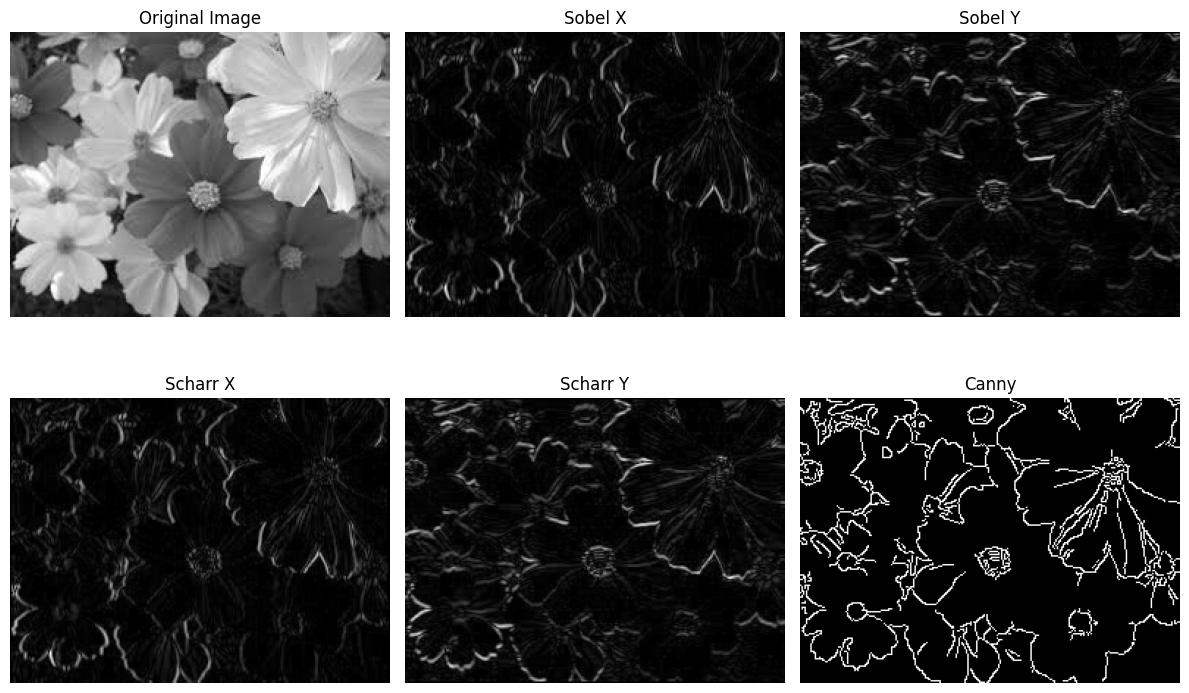

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = 'flow.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Apply edge detection using different operators
sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
scharr_x = cv2.Scharr(image, cv2.CV_64F, 1, 0)
scharr_y = cv2.Scharr(image, cv2.CV_64F, 0, 1)
canny = cv2.Canny(image, 100, 200)

# Plot the results
plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(np.abs(sobel_x), cmap='gray')
plt.title('Sobel X')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(np.abs(sobel_y), cmap='gray')
plt.title('Sobel Y')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(np.abs(scharr_x), cmap='gray')
plt.title('Scharr X')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(np.abs(scharr_y), cmap='gray')
plt.title('Scharr Y')
plt.axis('off')

plt.subplot(2, 3, 6)
plt.imshow(canny, cmap='gray')
plt.title('Canny')
plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
7.	Write a MATLAB/Python program to read coins.png, leveling all coins and display area of all coins

In [16]:
import cv2
import numpy as np

# Load the coins.png image
image_path = 'coins.png'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Apply Gaussian blur to reduce noise and enhance segmentation
blurred_image = cv2.GaussianBlur(image, (5, 5), 0)

# Apply Otsu's thresholding to binarize the image
_, thresholded = cv2.threshold(blurred_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Find contours in the binary image
contours, _ = cv2.findContours(thresholded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Calculate areas of all coins and display
total_area = 0

for idx, contour in enumerate(contours):
    area = cv2.contourArea(contour)
    total_area += area
    cv2.drawContours(image, [contour], 0, (0, 255, 0), 2)
    cv2.putText(image, f"Coin {idx+1}: {area:.2f}", (10, 30*(idx+1)), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

# Display the image with contours and labeled areas
cv2.imshow('Coins with Contours', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Print the total area of all coins
print(f"Total area of all coins: {total_area:.2f} pixels")


Total area of all coins: 49474.00 pixels


In [ ]:
8.	Display following image operation in MATLAB/Python - i) Threshold image ii) Power enhance contract image iii) High pass image.

In [18]:
import cv2
import numpy as np

# Load the image
image_path = 'flow.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# i) Threshold image
_, thresholded_image = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY)

# ii) Power enhance contrast image
gamma = 1.5
power_enhanced_image = np.power(image / 255.0, gamma)
power_enhanced_image = np.uint8(power_enhanced_image * 255)

# iii) High-pass image using Laplacian filter
laplacian_image = cv2.Laplacian(image, cv2.CV_64F)
high_pass_image = cv2.convertScaleAbs(laplacian_image)

# Display the original and processed images
cv2.imshow('Original Image', image)
cv2.imshow('Thresholded Image', thresholded_image)
cv2.imshow('Power-Enhanced Image', power_enhanced_image)
cv2.imshow('High-Pass Image', high_pass_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [ ]:
9.	Perform image enhancement, smoothing and sharpening, in spatial domain using different spatial filters and compare the performances 

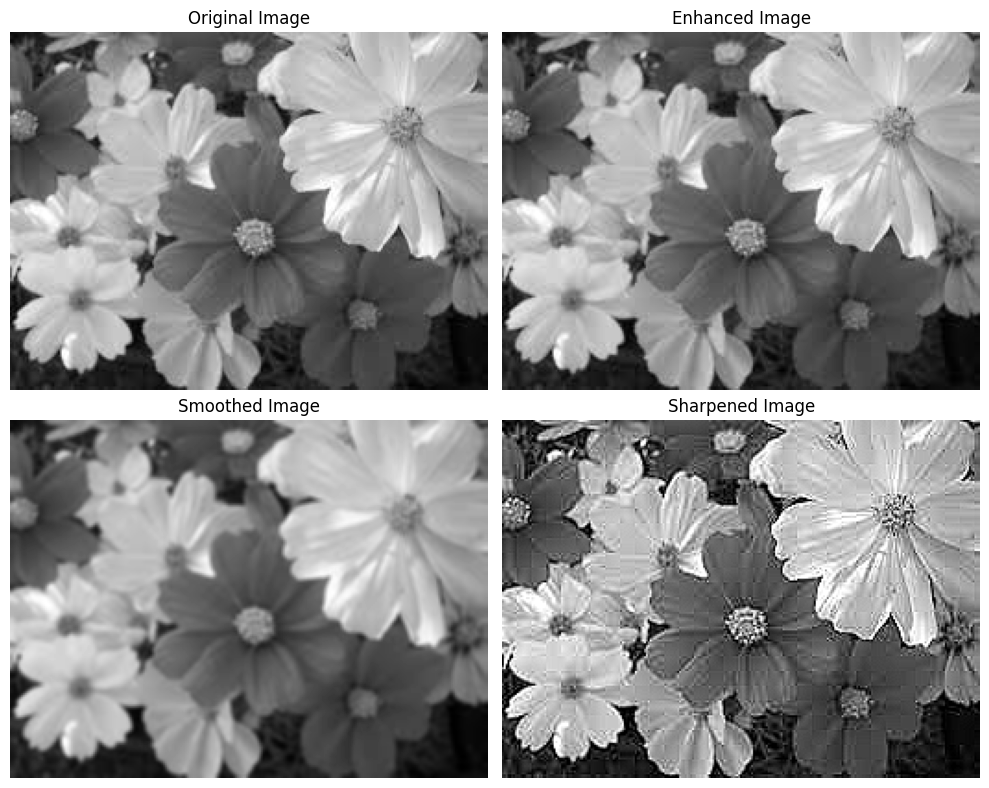

In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = 'flow.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Define different spatial filters
identity_filter = np.array([[0, 0, 0],
                            [0, 1, 0],
                            [0, 0, 0]])

average_filter = np.ones((3, 3)) / 9

sharpen_filter = np.array([[0, -1, 0],
                           [-1, 5, -1],
                           [0, -1, 0]])

# Apply filters
enhanced_image = cv2.filter2D(image, -1, identity_filter)
smoothed_image = cv2.filter2D(image, -1, average_filter)
sharpened_image = cv2.filter2D(image, -1, sharpen_filter)

# Plot original and processed images
plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(enhanced_image, cmap='gray')
plt.title('Enhanced Image')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(smoothed_image, cmap='gray')
plt.title('Smoothed Image')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(sharpened_image, cmap='gray')
plt.title('Sharpened Image')
plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
10.	Perform image enhancement, smoothing and sharpening, in frequency domain using different filters and compare the performances 

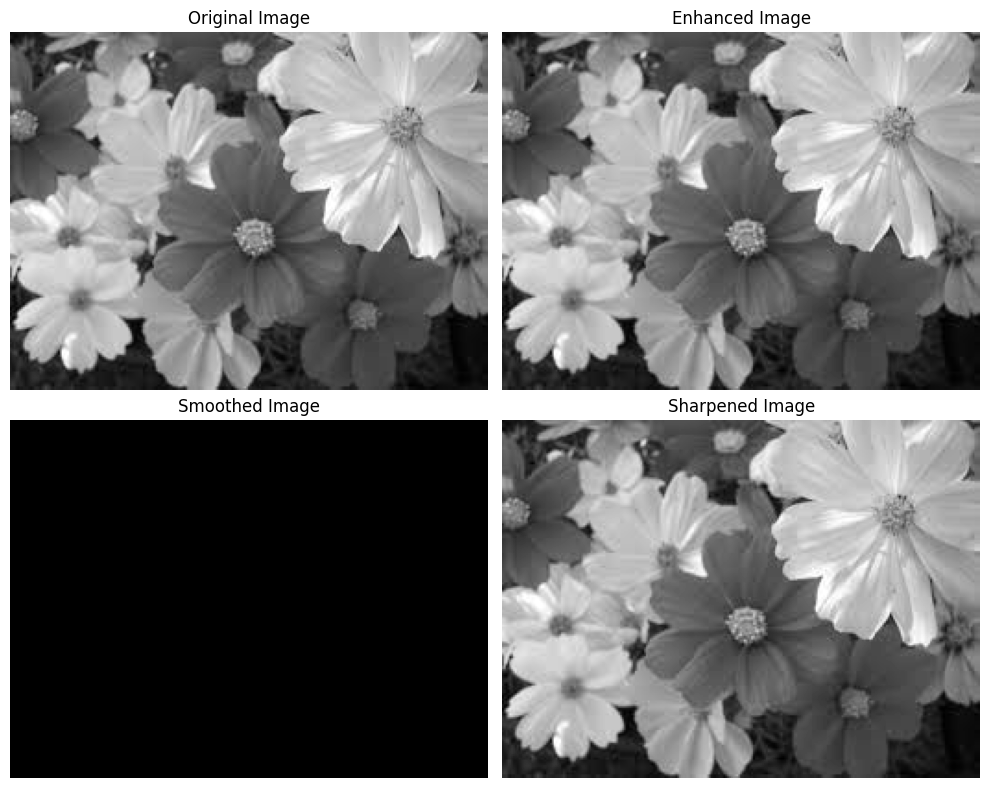

In [25]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fftshift, ifftshift, fft2, ifft2

# Load the image
image_path = 'flow.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Perform Fourier Transform
f_transform = fftshift(fft2(image))

# Define frequency domain filters
identity_filter = np.ones_like(f_transform)
low_pass_filter = np.zeros_like(f_transform)
low_pass_filter[200:400, 200:400] = 1
high_pass_filter = 1 - low_pass_filter

# Apply filters in frequency domain
enhanced_f_transform = f_transform * identity_filter
smoothed_f_transform = f_transform * low_pass_filter
sharpened_f_transform = f_transform * high_pass_filter

# Perform Inverse Fourier Transform
enhanced_image = np.abs(ifft2(ifftshift(enhanced_f_transform)))
smoothed_image = np.abs(ifft2(ifftshift(smoothed_f_transform)))
sharpened_image = np.abs(ifft2(ifftshift(sharpened_f_transform)))

# Plot original and processed images
plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(enhanced_image, cmap='gray')
plt.title('Enhanced Image')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(smoothed_image, cmap='gray')
plt.title('Smoothed Image')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(sharpened_image, cmap='gray')
plt.title('Sharpened Image')
plt.axis('off')

plt.tight_layout()
plt.show()


11Perform image enhancement, smoothing and sharpening, in frequency domain using different filters and compare the performances 

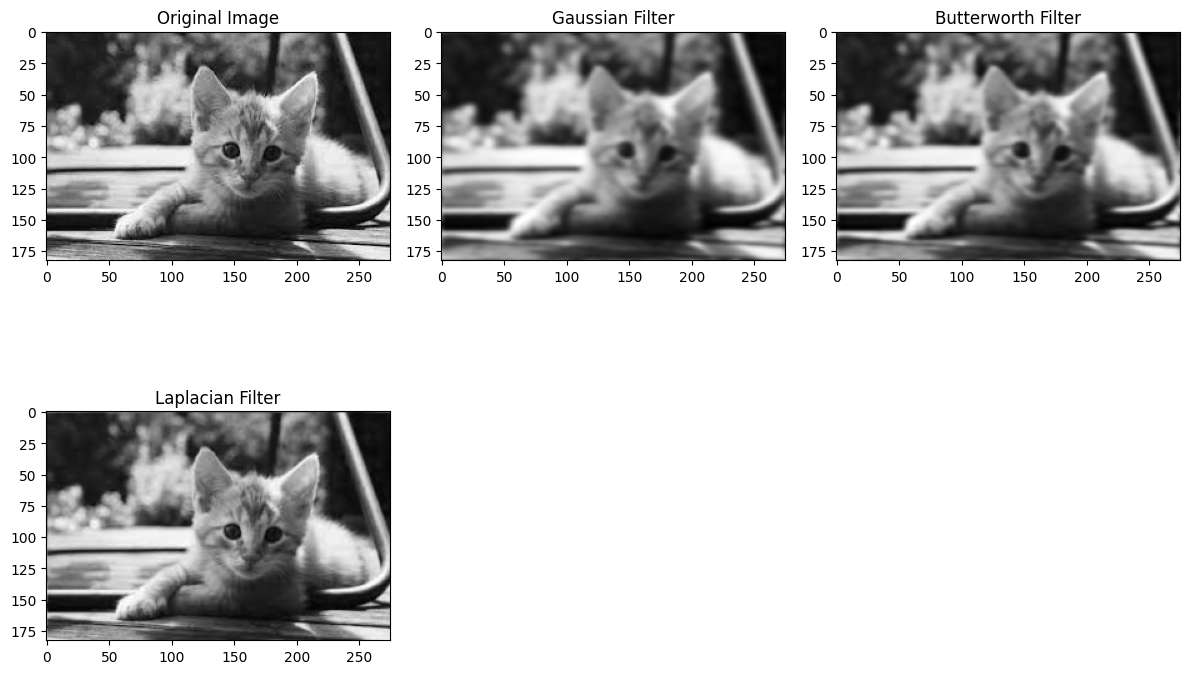

In [5]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from numpy.fft import fft2, ifft2, fftshift

# Load the image
image = cv2.imread('cat.jpg', cv2.IMREAD_GRAYSCALE)

# Perform FFT
f_transform = fft2(image)
f_transform_shifted = fftshift(f_transform)

# Define filter functions
def gaussian_filter(shape, sigma):
    x, y = shape
    center_x, center_y = x // 2, y // 2
    u, v = np.meshgrid(np.arange(y) - center_y, np.arange(x) - center_x)
    return np.exp(-(u**2 + v**2) / (2 * sigma**2))

def butterworth_filter(shape, cutoff, n):
    x, y = shape
    center_x, center_y = x // 2, y // 2
    u, v = np.meshgrid(np.arange(y) - center_y, np.arange(x) - center_x)
    d = np.sqrt(u**2 + v**2)
    return 1 / (1 + (d / cutoff)**(2 * n))

# Apply filters
gaussian_sigma = 20
butterworth_cutoff = 30
butterworth_n = 2

gaussian_result = f_transform_shifted * gaussian_filter(image.shape, gaussian_sigma)
butterworth_result = f_transform_shifted * butterworth_filter(image.shape, butterworth_cutoff, butterworth_n)

# Apply Laplacian filter
laplacian_filter = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])
laplacian_filter_transformed = fft2(laplacian_filter, s=image.shape)
laplacian_result = f_transform_shifted * laplacian_filter_transformed

# Inverse FFT
gaussian_output = np.abs(ifft2(fftshift(gaussian_result)))
butterworth_output = np.abs(ifft2(fftshift(butterworth_result)))
laplacian_output = np.abs(ifft2(fftshift(laplacian_result)))

# Plotting
plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(2, 3, 2)
plt.imshow(gaussian_output, cmap='gray')
plt.title('Gaussian Filter')

plt.subplot(2, 3, 3)
plt.imshow(butterworth_output, cmap='gray')
plt.title('Butterworth Filter')

plt.subplot(2, 3, 4)
plt.imshow(laplacian_output, cmap='gray')
plt.title('Laplacian Filter')

plt.tight_layout()
plt.show()


In [12]:
from skimage.metrics import mean_squared_error, peak_signal_noise_ratio, structural_similarity

# Calculate metrics
mse_gaussian = mean_squared_error(image, gaussian_output)
psnr_gaussian = peak_signal_noise_ratio(image, gaussian_output)
ssim_gaussian = structural_similarity(image, gaussian_output, data_range=image.max() - image.min())  # Specify data_range

mse_butterworth = mean_squared_error(image, butterworth_output)
psnr_butterworth = peak_signal_noise_ratio(image, butterworth_output)
ssim_butterworth = structural_similarity(image, butterworth_output, data_range=image.max() - image.min())  # Specify data_range

mse_laplacian = mean_squared_error(image, laplacian_output)
psnr_laplacian = peak_signal_noise_ratio(image, laplacian_output)
ssim_laplacian = structural_similarity(image, laplacian_output, data_range=image.max() - image.min())  # Specify data_range

# Print metrics
print("Metrics for Gaussian Filter:")
print("MSE:", mse_gaussian)
print("PSNR:", psnr_gaussian)
print("SSIM:", ssim_gaussian)
print()

print("Metrics for Butterworth Filter:")
print("MSE:", mse_butterworth)
print("PSNR:", psnr_butterworth)
print("SSIM:", ssim_butterworth)
print()

print("Metrics for Laplacian Filter:")
print("MSE:", mse_laplacian)
print("PSNR:", psnr_laplacian)
print("SSIM:", ssim_laplacian)


Metrics for Gaussian Filter:
MSE: 266.041064417238
PSNR: 23.8813168411142
SSIM: 0.8315490944980106

Metrics for Butterworth Filter:
MSE: 159.4601777376874
PSNR: 26.104281170364857
SSIM: 0.8893114448765066

Metrics for Laplacian Filter:
MSE: 851527.6843925313
PSNR: -11.171184111998976
SSIM: 0.05448626313600786


C:\Users\MD.NAIM HOSSAIN\AppData\Local\Temp\ipykernel_1516\3210956786.py:5: UserWarning: Inputs have mismatched dtype.  Setting data_range based on image_true.
  psnr_gaussian = peak_signal_noise_ratio(image, gaussian_output)
C:\Users\MD.NAIM HOSSAIN\AppData\Local\Temp\ipykernel_1516\3210956786.py:9: UserWarning: Inputs have mismatched dtype.  Setting data_range based on image_true.
  psnr_butterworth = peak_signal_noise_ratio(image, butterworth_output)
C:\Users\MD.NAIM HOSSAIN\AppData\Local\Temp\ipykernel_1516\3210956786.py:13: UserWarning: Inputs have mismatched dtype.  Setting data_range based on image_true.
  psnr_laplacian = peak_signal_noise_ratio(image, laplacian_output)


12.	Write a MATLAB/Python program to separation of voiced/un-voiced/silence regions from a speech signal.

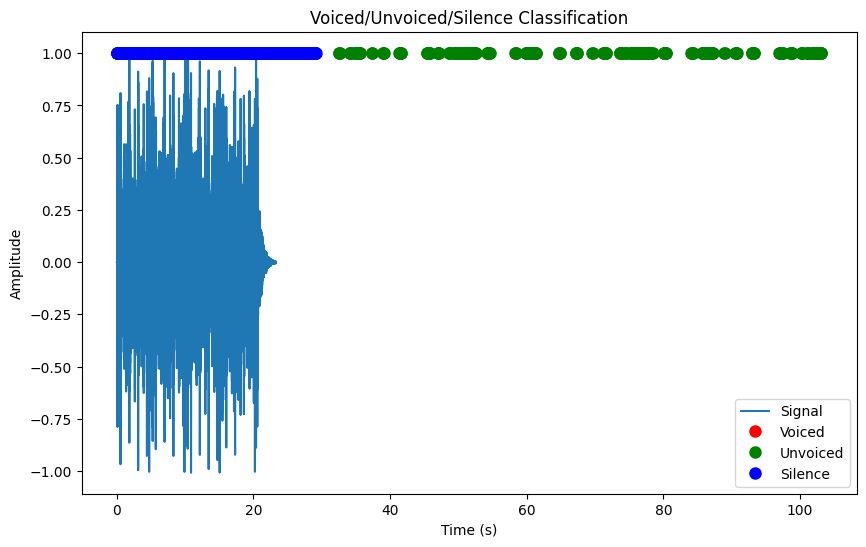

In [25]:
import librosa
import numpy as np
import matplotlib.pyplot as plt

def classify_audio_segments(signal, sr):
    # Calculate the Short-Time Fourier Transform (STFT)
    stft = np.abs(librosa.stft(signal))
    
    # Calculate energy for each time frame
    energy = np.sum(stft, axis=0)
    
    # Calculate pitch using the YIN algorithm
    pitches, magnitudes = librosa.piptrack(y=signal, sr=sr)
    pitch = np.median(pitches, axis=0)
    
    # Set energy and pitch thresholds
    energy_threshold = np.percentile(energy, 80)  # Adjust as needed
    pitch_threshold = .07  # Adjust as needed
    
    voiced_regions = []
    unvoiced_regions = []
    silence_regions = []
    
    for i in range(len(energy)):
        if energy[i] > energy_threshold and pitch[i] > pitch_threshold:
            voiced_regions.append(i)
        elif energy[i] > energy_threshold and pitch[i] <= pitch_threshold:
            unvoiced_regions.append(i)
        else:
            silence_regions.append(i)
    
    return voiced_regions, unvoiced_regions, silence_regions

# Load an audio file
file_path = 'file.wav'
signal, sr = librosa.load(file_path, sr=None)

# Classify audio segments
voiced_regions, unvoiced_regions, silence_regions = classify_audio_segments(signal, sr)

# Visualize the classification
plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(signal)) / sr, signal, label='Signal')
plt.plot(np.array(voiced_regions) * librosa.get_duration(y=signal, sr=sr) / len(voiced_regions), 
         np.ones(len(voiced_regions)) * np.max(signal), 'ro', markersize=8, label='Voiced')
plt.plot(np.array(unvoiced_regions) * librosa.get_duration(y=signal, sr=sr) / len(unvoiced_regions), 
         np.ones(len(unvoiced_regions)) * np.max(signal), 'go', markersize=8, label='Unvoiced')
plt.plot(np.array(silence_regions) * librosa.get_duration(y=signal, sr=sr) / len(silence_regions), 
         np.ones(len(silence_regions)) * np.max(signal), 'bo', markersize=8, label='Silence')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.title('Voiced/Unvoiced/Silence Classification')
plt.show()


13.	Write a MATLAB/Python program and plot multilevel speech resolution.

C:\Users\MD.NAIM HOSSAIN\AppData\Local\Temp\ipykernel_1516\700957114.py:10: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  D = librosa.amplitude_to_db(librosa.stft(signal), ref=np.max)


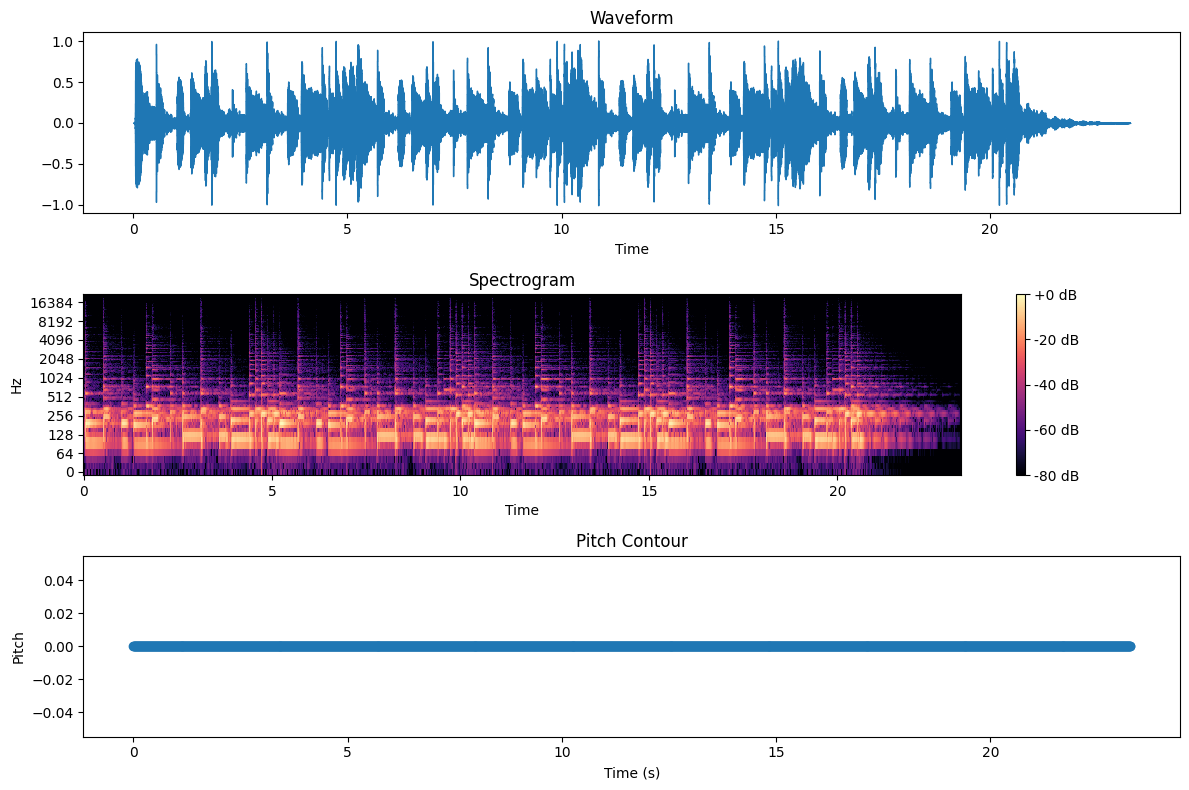

In [15]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Load an audio file
file_path = 'file.wav'
signal, sr = librosa.load(file_path, sr=None)

# Calculate the Short-Time Fourier Transform (STFT)
D = librosa.amplitude_to_db(librosa.stft(signal), ref=np.max)

# Calculate pitch using the YIN algorithm
pitches, magnitudes = librosa.piptrack(y=signal, sr=sr)
pitch = np.median(pitches, axis=0)

# Plot the multilevel speech resolution
plt.figure(figsize=(12, 8))

# Plot the waveform
plt.subplot(3, 1, 1)
librosa.display.waveshow(signal, sr=sr)
plt.title('Waveform')

# Plot the spectrogram
plt.subplot(3, 1, 2)
librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')

# Plot the pitch contour
plt.subplot(3, 1, 3)
plt.plot(np.arange(len(pitch)) * librosa.get_duration(y=signal, sr=sr) / len(pitch), pitch, 'o-')
plt.xlabel('Time (s)')
plt.ylabel('Pitch')
plt.title('Pitch Contour')

plt.tight_layout()
plt.show()


14.	Write a MATLAB/Python program to recognize speech signal.

In [ ]:
import speech_recognition as sr

# Initialize the recognizer
recognizer = sr.Recognizer()

# Load an audio file
file_path = 'file.wav'

# Read the audio file using the recognizer
with sr.AudioFile(file_path) as source:
    audio = recognizer.record(source)

# Recognize speech using Google Web Speech API
try:
    recognized_text = recognizer.recognize_google(audio)
    print("Recognized text: ", recognized_text)
except sr.UnknownValueError:
    print("Speech recognition could not understand audio")
except sr.RequestError as e:
    print(f"Could not request results from Google Web Speech API; {e}")


15.	Write a MATLAB/Python program for text-to-speech conversion and record speech signal.

In [ ]:
from gtts import gTTS
import sounddevice as sd
import os

# Text to be converted to speech
text = "Hello, this is a text-to-speech conversion example."

# Perform text-to-speech conversion
tts = gTTS(text)
tts.save("output1.mp3")

# Play the generated speech using your system's default media player
os.system("start output.mp3")

# Wait for the speech to finish playing
input("Press Enter after the speech finishes playing...")

# Record the played speech
recording_duration = len(tts)  # Duration in seconds
recording = sd.rec(int(recording_duration * sd.default.samplerate), samplerate=sd.default.samplerate, channels=1)
sd.wait()

# Save the recorded speech as a WAV file
output_wav_file = "recorded_speech.wav"
sd.write(output_wav_file, recording, sd.default.samplerate)

print("Text-to-speech and speech recording complete.")


In [ ]:
# je kon acta
from gtts import gTTS
import sounddevice as sd
import os

# Text to be converted to speech
text = "Hello, this is a text-to-speech conversion example."

# Perform text-to-speech conversion
tts = gTTS(text)
tts.save("output.mp3")

# Play the generated speech
sd.play(tts)

# Wait for the speech to finish playing
sd.wait()

# Record the played speech
recording_duration = len(tts)  # Duration in seconds
recording = sd.rec(int(recording_duration * sd.default.samplerate), samplerate=sd.default.samplerate, channels=1)
sd.wait()

# Save the recorded speech as a WAV file
output_wav_file = "recorded_speech.wav"
sd.write(output_wav_file, recording, sd.default.samplerate)

print("Text-to-speech and speech recording complete.")
